In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# Content

* [1. Preface](#chapter_preface)
* [2. Train & Test](#chapter_train_test)
 * [2-1. msno](#section_msno)
 * [2-2. song](#section_song)
 * [2-3. sources](#section_sources)
 * [2-4. conclusion](#section_conclusion2)

<a id='chapter_preface'></a>
# Preface

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
comb_df = train_df.append(test_df)
members_df = pd.read_csv('data/members.csv')
songs_df = pd.read_csv('data/songs.csv')
song_extra_info_df = pd.read_csv('data/song_extra_info.csv')

songs_df = songs_df.merge(song_extra_info_df, on='song_id', how='left')

train_df = train_df.merge(songs_df, on='song_id', how='left')
test_df = test_df.merge(songs_df, on='song_id', how='left')

train_df = train_df.merge(members_df, on='msno', how='left')
test_df = test_df.merge(members_df, on='msno', how='left')

# fill missing data to visualize
train_df.fillna('nan', inplace=True)
test_df.fillna('nan', inplace=True)

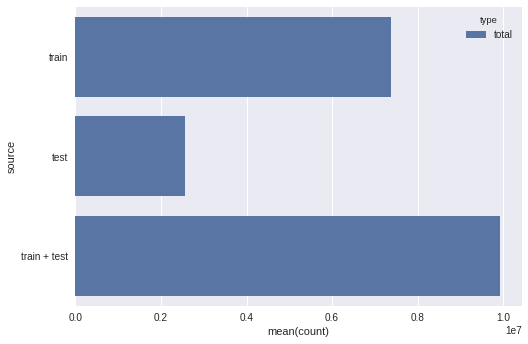

,count,source,type
0,7377418,train,total
1,2556790,test,total
2,9934208,train + test,total


In [3]:
total_row_df = pd.DataFrame(data={
    'source': ['train', 'test', 'train + test'],
    'type': ['total', 'total', 'total'],
    'count': [train_df.shape[0],
              test_df.shape[0],
              comb_df.shape[0]]
})
sns.barplot(x='count', y='source', hue='type', data=total_row_df)
sns.plt.show()

total_row_df

- **train set** has **7377418 rows**.
- **test set** has **2556790 rows**.
- **(train + test) set** has **9934208 rows**.

<a id='chapter_train_test'></a>
# Train & Test

At first, we focus on the basic data; i.e., train set and test set.

<a id="section_msno"></a>
## msno (users)

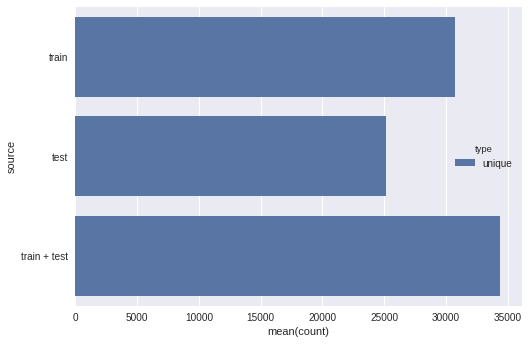

0.42% unique users are contained in train set
0.98% unique users are contained in test set
0.35% unique users are contained in (train + test) set


,count,source,type
0,30755,train,unique
1,25131,test,unique
2,34403,train + test,unique


In [4]:
train_unique_msno_series = train_df['msno'].drop_duplicates()
test_unique_msno_series = test_df['msno'].drop_duplicates()
comb_unique_msno_series = comb_df['msno'].drop_duplicates()

msno_unique_df = pd.DataFrame(data={
    'source': ['train', 'test', 'train + test'],
    'type': ['unique', 'unique', 'unique'],
    'count': [len(train_unique_msno_series),
              len(test_unique_msno_series),
              len(comb_unique_msno_series)]
})
sns.barplot(x='count', y='source', hue='type', data=msno_unique_df)
sns.plt.show()

print('%.2f%% unique users are contained in train set' % (len(train_unique_msno_series) / train_df.shape[0] * 100))
print('%.2f%% unique users are contained in test set' % (len(test_unique_msno_series) / test_df.shape[0] * 100))
print('%.2f%% unique users are contained in (train + test) set' % (len(comb_unique_msno_series) / comb_df.shape[0] * 100))
msno_unique_df

- **train set** has **7377418 rows** and has only **30755 unique** users. Each user contributes **238 rows in average**.
- **test set** has **2556790 rows** and has only **25131 unique** users. Each user contributes **102 rows in average**.
- **(train + test) set** has **9934208 rows** and has only **34403 unique** users.
- **9272 unique** users are contained in **(train \ test) set**.
- **3648 unique** users are contained in **(test \ train) set**.

3648 / 25131 = **14.5% of users** in test set which not shown in train set.

In [5]:
train_minus_test_by_msno_df = train_df[~train_df['msno'].isin(test_unique_msno_series)]
test_minus_train_by_msno_df = test_df[~test_df['msno'].isin(train_unique_msno_series)]

print('%d rows are contained in train set but not contained in test set' % len(train_minus_test_by_msno_df))
print('%d rows are contained in test set but not contained in train set' % len(test_minus_train_by_msno_df))

431857 rows are contained in train set but not contained in test set
184018 rows are contained in test set but not contained in train set


184018 / 2556790 = **7.2% of msno rows** in test set which not shown in train set.

<a id='section_song'></a>
## song

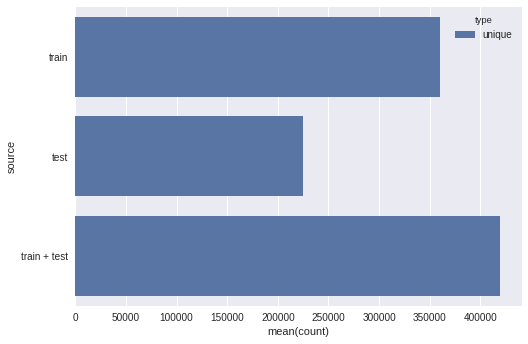

4.88% unique songs are contained in train set
8.79% unique songs are contained in test set
4.23% unique songs are contained in (train + test) set


,count,source,type
0,359966,train,unique
1,224753,test,unique
2,419839,train + test,unique


In [6]:
train_unique_song_series = train_df['song_id'].drop_duplicates()
test_unique_song_series = test_df['song_id'].drop_duplicates()
comb_unique_song_series = comb_df['song_id'].drop_duplicates()

song_unique_df = pd.DataFrame(data={
    'source': ['train', 'test', 'train + test'],
    'type': ['unique', 'unique', 'unique'],
    'count': [len(train_unique_song_series),
              len(test_unique_song_series),
              len(comb_unique_song_series)]
})
sns.barplot(x='count', y='source', hue='type', data=song_unique_df)
sns.plt.show()

print('%.2f%% unique songs are contained in train set' % (len(train_unique_song_series) / train_df.shape[0] * 100))
print('%.2f%% unique songs are contained in test set' % (len(test_unique_song_series) / test_df.shape[0] * 100))
print('%.2f%% unique songs are contained in (train + test) set' % (len(comb_unique_song_series) / comb_df.shape[0] * 100))
song_unique_df

- **train set** has **7377418 rows** and has only **359966 unique** songs. Each song contributes **20 rows in average**.
- **test set** has **2556790 rows** and has only **224753 unique** songs. Each song contributes **11 rows in average**.
- **(train + test) set** has **9934208 rows** and has only **419839 unique** songs.
- **195086 unique** songs are contained in **(train \ test) set**.
- **59873 unique** songs are contained in **(test \ train) set**.

59873 / 224753 = **26.6% of songs** in test set which not shown in train set.

In [7]:
train_minus_test_by_song_df = train_df[~train_df['song_id'].isin(test_unique_song_series)]
test_minus_train_by_song_df = test_df[~test_df['song_id'].isin(train_unique_song_series)]

print('%d rows are contained in train set but not contained in test set' % len(train_minus_test_by_song_df))
print('%d rows are contained in test set but not contained in train set' % len(test_minus_train_by_song_df))

342793 rows are contained in train set but not contained in test set
320125 rows are contained in test set but not contained in train set


320125  / 2556790 = **12.5% of song rows** in test set which not shown in train set.

<a id='section_sources'></a>
## sources (system_tab, screen_name, source_type)

In [8]:
def target_count_plot(column):
    print(sorted(list(train_df[column].unique())))
    print(len(list(train_df[column].unique())))
    print(sorted(list(test_df[column].unique())))
    print(len(list(test_df[column].unique())))
    sns.countplot(y=column, hue='target', data=train_df, order=train_df[column].value_counts().index)
    sns.plt.show()

['discover', 'explore', 'listen with', 'my library', 'nan', 'notification', 'null', 'radio', 'search', 'settings']
10
['discover', 'explore', 'listen with', 'my library', 'nan', 'notification', 'null', 'radio', 'search', 'settings']
10


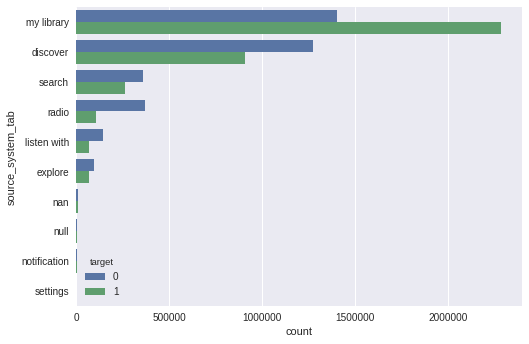

In [9]:
target_count_plot('source_system_tab')

A user at **'my library' tab** seems to be more chance to listen a song again.

There are **'null'** and **nan** value. Are they could be considered as the same tab? 
Here, their distribuion are similar with each other, and the occurances are low. So we treat them as the same tab.

['Album more', 'Artist more', 'Concert', 'Discover Chart', 'Discover Feature', 'Discover Genre', 'Discover New', 'Explore', 'Local playlist more', 'My library', 'My library_Search', 'Online playlist more', 'Others profile more', 'Payment', 'Radio', 'Search', 'Search Home', 'Search Trends', 'Self profile more', 'Unknown', 'nan']
21
['Album more', 'Artist more', 'Concert', 'Discover Chart', 'Discover Feature', 'Discover Genre', 'Discover New', 'Explore', 'Local playlist more', 'My library', 'My library_Search', 'Online playlist more', 'Others profile more', 'Payment', 'People global', 'People local', 'Radio', 'Search', 'Search Home', 'Search Trends', 'Self profile more', 'Unknown', 'nan']
23


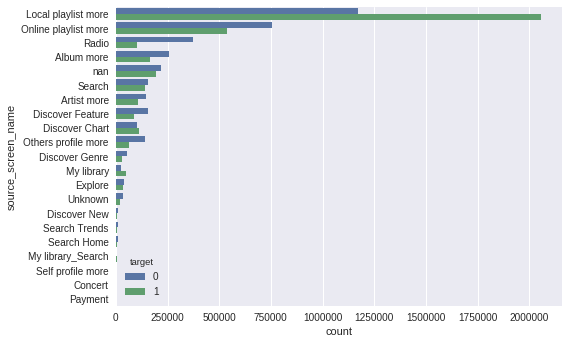

In [10]:
target_count_plot('source_screen_name')

A user at **'Local playlist more'** and **'My library'** seem to be more chance to listen a song again.

There are **nan** and **Unknown** value. Are they could be considered as the same screen name?
It seems that <font color='red'>missing data occur often</font>; however, target distribution is also almost the same.

**test set** has **'People global', 'People local'** screen names which are not shown in **train set**.

['album', 'artist', 'listen-with', 'local-library', 'local-playlist', 'my-daily-playlist', 'nan', 'online-playlist', 'radio', 'song', 'song-based-playlist', 'top-hits-for-artist', 'topic-article-playlist']
13
['album', 'artist', 'listen-with', 'local-library', 'local-playlist', 'my-daily-playlist', 'nan', 'online-playlist', 'radio', 'song', 'song-based-playlist', 'top-hits-for-artist', 'topic-article-playlist']
13


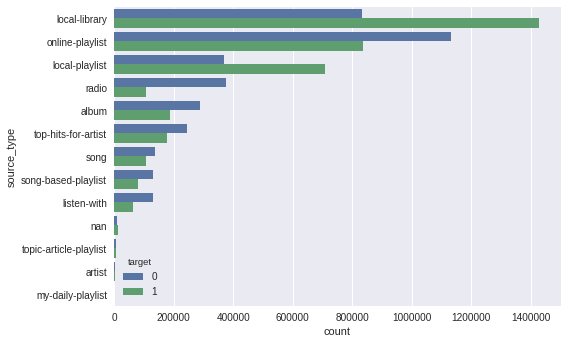

In [11]:
target_count_plot('source_type')

A user at **'local-library'** seems to be more chance to listen a song again.

The top 3 occurances are **local-library**, **online-playlist**, **local-playlist**.

There are **nan** value. It appears really small almost the same as **artist**, **topic-article-playlist**, **my-daily-playlist**.

<a id='section_conclusion2'></a>
## conclusion

1. There are rows appears in **test set** but not in **train set**.
2. Users adopt to their own personal library or playlist very often.